In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

data = pd.read_csv("gap.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


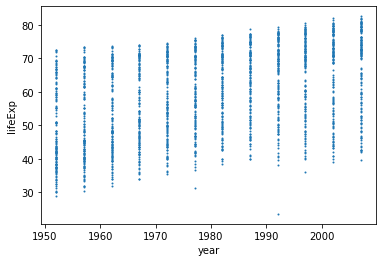

In [33]:
#Exersice 1
fig, ax = plt.subplots()
data.groupby('year').plot.scatter(x='year', y='lifeExp', s=1, ax=ax)
plt.show()

Question 1: 
There is an increasing trend of life expectancy across time. This trend is mostly linear. The graph below proves my argument as it shows the average of life expectancy in each year. 

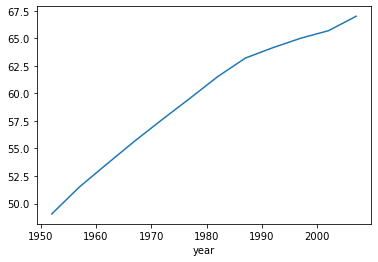

In [34]:
meanle = data.groupby('year').mean()
meanle['lifeExp'].plot(x='year', y='lifeExp')
plt.show()

Question 2:
The distributions of life expectancy in 1952 and 1957 are right skewed since there are more low life expentancies. Then in 1962 and 1967, the distributions become moslty symetric. Then the distributions become left skewed in the following years because of the improving life expectancy. 

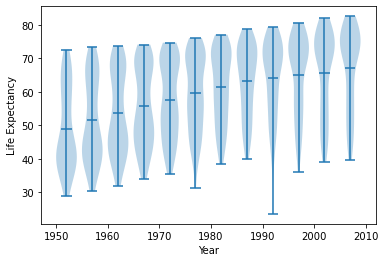

In [35]:
years = data['year'].unique()
life_exp_per_year = []
for year in years:
    life_exp_per_year.append(list(data[data['year'] == year]['lifeExp']))
    
fig, ax = plt.subplots()

ax.violinplot(life_exp_per_year,years,widths=4,showmeans=True)
ax.set_xlabel("Year")
ax.set_ylabel("Life Expectancy")
plt.show()

Question 3:
I'll reject the null hypothesis of no relationshihp between year and life expectancy. Because generally there is an increasing trend of life expentancy as year moves on. The slope of linear regression is likely to be non zero.

Question 4:
I think the shape of the violin plot of residuals would be similar to the original one, but the mean of residuals in each year would be center around 0 since it's the best fit line. 

Question 5:
First few bars in Violin plot should be wider in bottom and then following bars become wider in top.

In [36]:
#Exercise 2
X = data[["year"]]
y = data[["lifeExp"]]
reg = LinearRegression()
result = reg.fit(X, y)
# The coefficients
print('Coefficients: \n', reg.coef_)
# The Intercept
print('Intercept: %.2f'% reg.intercept_)

Coefficients: 
 [[0.32590383]]
Intercept: -585.65


In [64]:
#Question 6
#On averrage, Life expectancy increases 0.326 every year around the world.
a = np.array(list(meanle['lifeExp']))
diffs = np.diff(a)
sum(diffs)/len(diffs)/5

0.3263600512163889

#Question 7:
I reject the null hypothesis of no relatinship between year and life expectancy because the coeffeicient is 0.3 which is greater than 0.

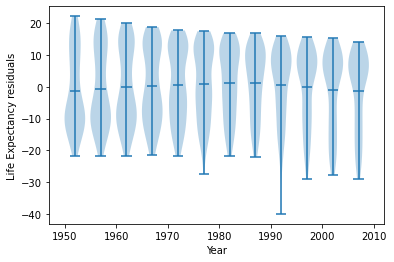

In [37]:
#Exercise 3:
residuals = y-reg.predict(X)
residuals['year'] = data["year"]
res_per_year = []
for year in years:
    res_per_year.append(list(residuals[residuals['year'] == year]['lifeExp']))
fig, ax = plt.subplots()

ax.violinplot(res_per_year,years,widths=4,showmeans=True)
ax.set_xlabel("Year")
ax.set_ylabel("Life Expectancy residuals")
plt.show()

Question 8:
The plot matches my expection that mean all around 0 and the shape of each bars are similar to oringial ones.

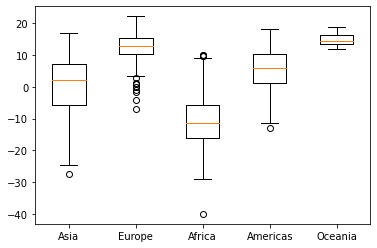

In [38]:
#Excercise 4
residuals['continent'] = data['continent']
continents = ['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']
res_per_continent = []
for continent in continents:
    res_per_continent.append(list(residuals[residuals['continent'] == continent]['lifeExp']))
    
fig, ax = plt.subplots()

ax.boxplot(res_per_continent)
plt.xticks([1, 2, 3, 4, 5], ['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'])
plt.show()

Question 9:
There is dependence between model residual and continent. Africa gdp is lower so we can see it's life expectancy is lower too and continents that has higher GDP would have a higher life expectancy. Becasue continent also matter so we couldn't only look at one variable which is year. We need also consider continent when we analyze the outcome of life expectancy. 

In [39]:
#Exercise 5
grouped = data.groupby('continent')

Coefficients: 
 [[0.28952926]]


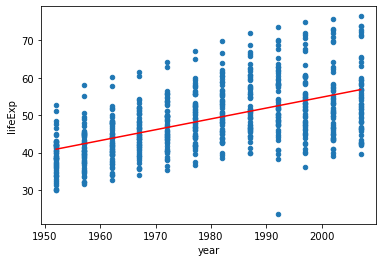

Coefficients: 
 [[0.36765094]]


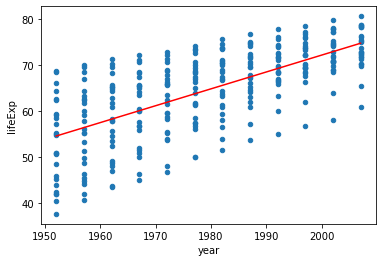

Coefficients: 
 [[0.4531224]]


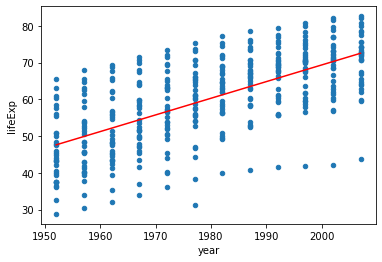

Coefficients: 
 [[0.22193214]]


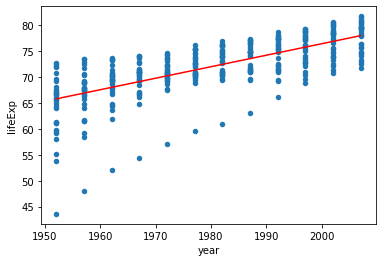

Coefficients: 
 [[0.21027238]]


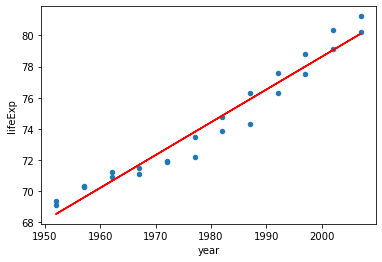

In [62]:
#Scatter plot of life expectancy vs year for each continent
for group in grouped.groups.keys():
    df = grouped.get_group(group)
    X = df[['year']]
    y = df[['lifeExp']]
    reg = LinearRegression()
    reg.fit(X, y)
    df.plot.scatter(x='year', y='lifeExp')
    plt.plot(X, reg.predict(X), color = 'red')
    print('Coefficients: \n', reg.coef_)
    plt.show()


Question 10:
Based on the plots, my regression model should include an interaction term for continent and year. Because the slope of the regression lines for different continents are different.
Question 12: On average, life expectancy increases for each year for each continent are their slope of regression line that are showed in the above.

In [41]:
#Exercise 6
standard_feature = data[['year','lifeExp']]
continent_feature = pd.get_dummies(data.continent, drop_first=True, prefix='continent')
combined_features = pd.concat([standard_feature, continent_feature], axis=1)
conts = data.continent.values
for c in filter(lambda c: c!='Africa', conts):
    combined_features['year*'+c] = combined_features['continent_'+c]*combined_features['year']

lr = LinearRegression()
x = combined_features.drop('lifeExp',axis=1)
lr.fit(x, standard_feature['lifeExp'])
cols = list(combined_features.columns)
cols.remove('lifeExp')
# The coefficients
i = 0
for c in lr.coef_:
    print(c ,'*', cols[i],"+")
    i+=1
# The Intercept
print('Intercept: %.2f'% lr.intercept_)

0.2895292630446554 * year +
-138.84844718069064 * continent_Americas +
-312.6330492174168 * continent_Asia +
156.84685209829306 * continent_Europe +
182.34988289860686 * continent_Oceania +
0.16359314085447352 * year*Asia +
-0.06759711852247108 * year*Europe +
0.07812167401824865 * year*Americas +
-0.0792568854225415 * year*Oceania +
Intercept: -524.26


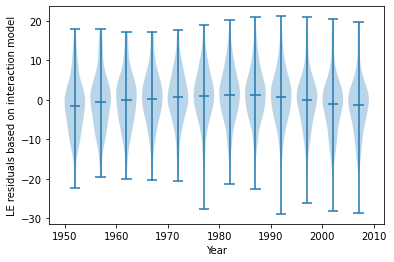

In [46]:
#Exercise 7
res = standard_feature['lifeExp']-lr.predict(x)
res = pd.DataFrame(res)
res['year'] = standard_feature['year']
res_per_year_newmodel = []
for year in years:
    res_per_year_newmodel.append(list(res[res['year'] == year]['lifeExp']))
fig, ax = plt.subplots()

ax.violinplot(res_per_year_newmodel,years,widths=4,showmeans=True)
ax.set_xlabel("Year")
ax.set_ylabel("LE residuals based on interaction model")
plt.show()